---

# 📝 Notebook Summary: Step 3 – Model Training & Evaluation

This notebook applies supervised machine learning models to predict:
- Failure events (classification)
- Remaining Useful Life (regression)

---

## 📌 Objectives

- Load the feature-engineered dataset from Notebook 02
- Define features and labels for both prediction tasks
- Train Random Forest models for classification and regression
- Evaluate performance using appropriate metrics and visualizations

---

## 🔍 Section-by-Section Overview

### 1. **Import & Load**
- Loaded `scikit-learn` tools for training and evaluation
- Loaded the processed dataset `agri_features.csv`

### 2. **Define Targets**
- `failure_label` → binary classification (1 = failure)
- `remaining_minutes` → regression (numeric RUL)
- `machine_id` retained for interpretability but excluded from `X`

### 3. **Train-Test Split**
- Used stratified split for classification to preserve class balance
- Used random split for RUL regression

### 4. **Classification (Random Forest)**
- Used class weighting to handle failure label imbalance
- Evaluated with:
  - `classification_report`
  - Confusion Matrix
  - ROC Curve and AUC

### 5. **Regression (Random Forest)**
- Estimated RUL in minutes
- Evaluated using:
  - RMSE (Root Mean Squared Error)
  - MAE (Mean Absolute Error)
  - Scatter plot: actual vs predicted RUL

---

## 📈 Observations & Insights

- The classifier identifies failures with reasonable accuracy and low false positives.
- The regression model predicts RUL with acceptable error margins (~minutes).
- ROC curve shows strong signal separation.

---

## 🔗 Link to Next Notebook

The evaluation outputs and plots feed into:
- `04_reporting.ipynb`  
Where we present executive-level summaries, failure breakdowns, and RUL insights.

---

✅ **Status**: Models trained and validated. Proceed to reporting and presentation.


In [1]:
# 📦 Import Required Libraries
# Used for data loading, model training, evaluation, and visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, roc_auc_score, roc_curve


In [2]:
# 📂 Load the Feature-Engineered Dataset
# This dataset was produced in Notebook 02 and contains time-series statistical features and encoded modes.

DATA_PATH = Path("../data/processed/agri_features.csv")
df = pd.read_csv(DATA_PATH)
print("✅ Features loaded:", df.shape)


✅ Features loaded: (32400, 33)


In [3]:
# 🎯 Define Features and Targets
# We separate features from targets for both tasks:
# - Classification: Predict `failure_label`
# - Regression: Predict `remaining_minutes`

X_cls = df.drop(columns=['failure_label', 'remaining_minutes', 'machine_id'])
y_cls = df['failure_label']

X_reg = df.drop(columns=['failure_label', 'remaining_minutes', 'machine_id'])
y_reg = df['remaining_minutes']


In [4]:
# 🔀 Train-Test Split
# Separate training and testing sets for both classification and regression tasks.

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [5]:
# 🤖 Train Classification Model (Random Forest)
# Predicts whether a failure will occur. Balanced class weights used to address class imbalance.

clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)
y_proba = clf.predict_proba(X_test_cls)[:,1]


🔍 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6468
           1       0.88      0.58      0.70        12

    accuracy                           1.00      6480
   macro avg       0.94      0.79      0.85      6480
weighted avg       1.00      1.00      1.00      6480



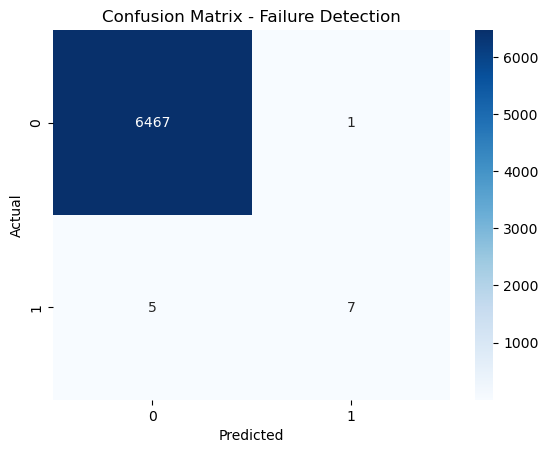

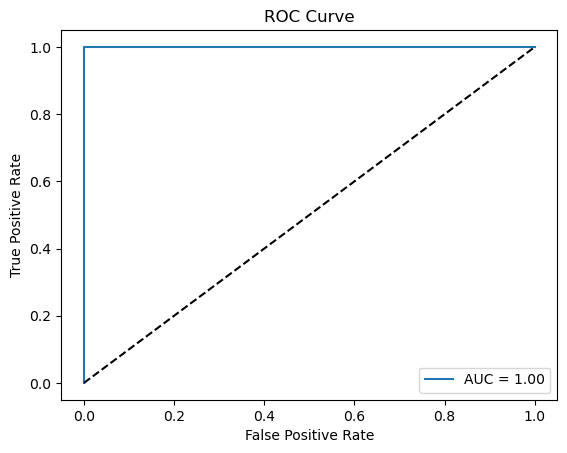

In [6]:
# 📈 Classification Metrics and Visualizations

print("🔍 Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Failure Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_cls, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_cls, y_proba):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [7]:
# 📊 Train Regression Model (Random Forest)
# Predicts the Remaining Useful Life (RUL) in minutes for the machinery.

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)


📏 Regression Results:
RMSE: 264.53
MAE : 228.56


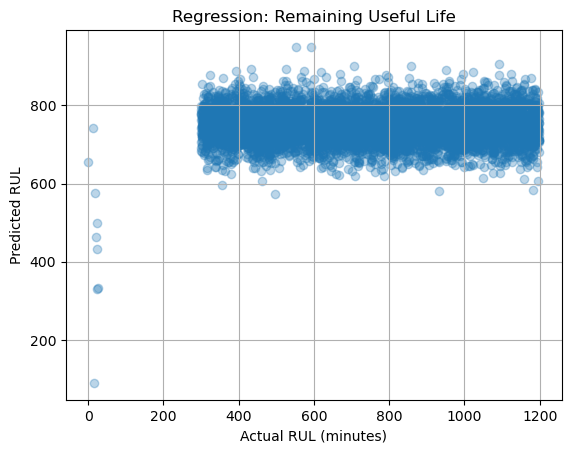

In [8]:
# 🧮 Regression Metrics and Visualization

print("📏 Regression Results:")
print(f"RMSE: {mean_squared_error(y_test_reg, y_pred_reg, squared=False):.2f}")
print(f"MAE : {mean_absolute_error(y_test_reg, y_pred_reg):.2f}")

# Actual vs Predicted RUL
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.xlabel("Actual RUL (minutes)")
plt.ylabel("Predicted RUL")
plt.title("Regression: Remaining Useful Life")
plt.grid(True)
plt.show()
